# Tests on a some functions

In [7]:
import adaptive
adaptive.notebook_extension()

# Import modules that are used in multiple cells
import holoviews as hv
import numpy as np
from functools import partial
import random
import matplotlib.pylab as pl
import matplotlib.pyplot as plt

from adaptive.tests import test_average_learner1d as tests
from adaptive.learner.learner1D import (curvature_loss_function,
                                        uniform_loss,
                                        default_loss,
                                        triangle_loss)

%config InlineBackend.figure_formats=set(['svg'])

%config InlineBackend.figure_formats=set(['png'])

# Function 1

In [8]:
def fun1(x, sigma = 0):
    fun = 0.5*(x-2)**3*np.sin(x)
    return fun*np.random.normal(1,sigma)

bounds = [0,5]
sigma = 1.5

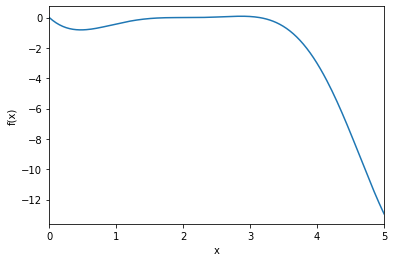

In [9]:
tests.plot_fun(partial(fun1, sigma = 0), [0,5])

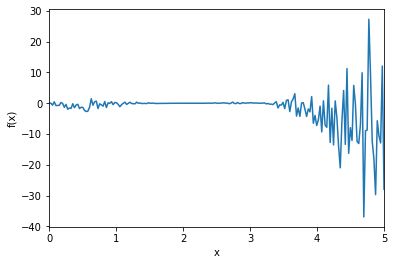

In [10]:
tests.plot_fun(partial(fun1, sigma = sigma), [0,5])

### Learner1D

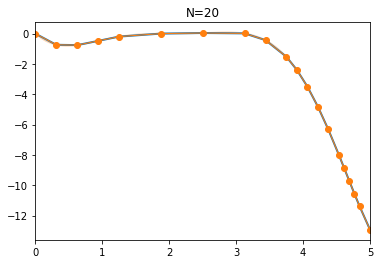

In [11]:
learner1 = adaptive.Learner1D(partial(fun1, sigma = 0), bounds = bounds, 
                              loss_per_interval=default_loss)
tests.run_N(learner1,20)
tests.plot_learner(learner1)

### AverageLearner1D

In [12]:
# Learner params
strategy = 5
min_samples = 5
delta = 0.5
alfa = 0.005
min_Delta_g = 0.001
max_samples = 10000
loss_per_interval = default_loss

fun = partial(fun1, sigma = sigma)

## -----------------------------------

# Initialize learner
learner = adaptive.AverageLearner1D(fun,
                                    strategy = strategy,
                                    bounds=bounds, delta=delta, 
                                    min_samples=min_samples, alfa=alfa,
                                    max_samples=max_samples,
                                   loss_per_interval=loss_per_interval)

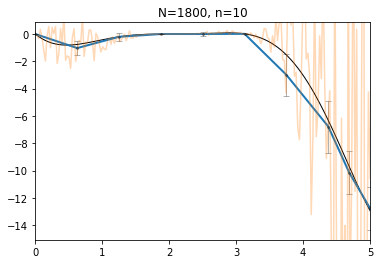

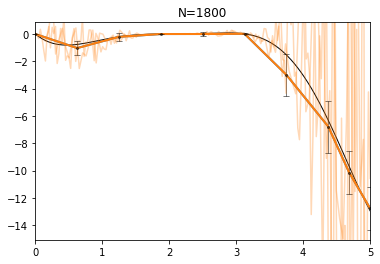

In [13]:
tests.simple_liveplot(learner, N_batch = 100, goal = lambda l: l.total_samples()==10000)

<br>
&nbsp;
<br>
&nbsp;
<br>
&nbsp;

# Function 2: infinite jump

The results of any learner (either Learner1D or Average) are very poor when having a discontinuity with an infinite jump. The solution is to cap the values of the function to a reasonable range.

In [14]:
def fun2(x, sigma = 0):
    fun = 3*np.sin(1.5*x**2)+1/x
    fun = np.clip(fun, -50, 50)
    return fun * np.random.normal(1,sigma) + np.random.normal(0,0.5*sigma)

bounds = [-np.pi,2*np.pi]
sigma = 1.5

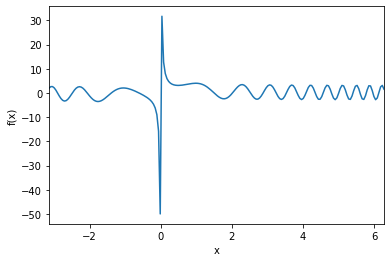

In [15]:
tests.plot_fun(partial(fun2, sigma = 0), bounds)

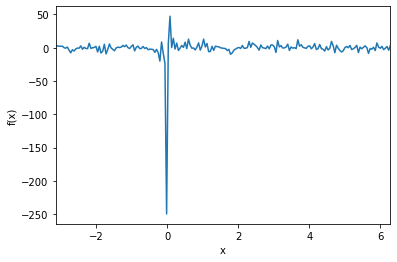

In [16]:
tests.plot_fun(partial(fun2, sigma = sigma), bounds)

### Learner1D - default loss

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


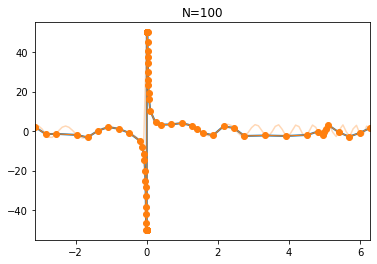

In [17]:
learner1 = adaptive.Learner1D(partial(fun2, sigma = 0), bounds = bounds, 
                              loss_per_interval=default_loss)
tests.run_N(learner1,100)
tests.plot_learner(learner1)

### Learner1D - triangle loss

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


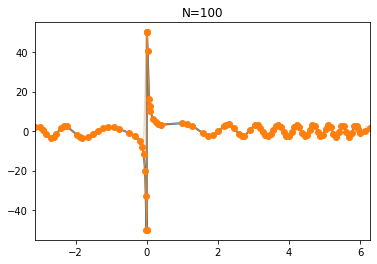

In [18]:
learner1 = adaptive.Learner1D(partial(fun2, sigma = 0), bounds = bounds, 
                              loss_per_interval=triangle_loss)
tests.run_N(learner1,100)
tests.plot_learner(learner1)

### AverageLearner1D

In [19]:
# Learner params
strategy = 5
min_samples = 5
delta = 1
alfa = 0.005
min_Delta_g = 0.001
max_samples = 1000
loss_per_interval = triangle_loss

fun = partial(fun2, sigma = sigma)

randomseed = 2

## -----------------------------------

# Initialize learner
learner = adaptive.AverageLearner1D(fun,
                                    strategy = strategy,
                                    bounds=bounds, delta=delta, 
                                    min_samples=min_samples, alfa=alfa,
                                    max_samples=max_samples)

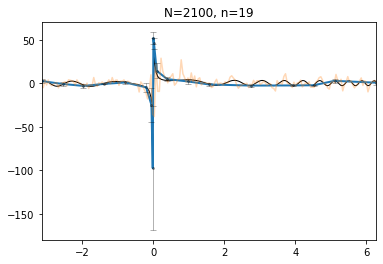

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


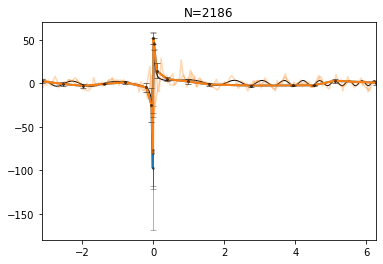

In [20]:
random.seed(randomseed)
np.random.seed(randomseed)

tests.simple_liveplot(learner, N_batch = 100, goal = lambda l: l.total_samples()==10000)

<br>
&nbsp;

__The AverageLearner1D works really bad with infinite jumps__

<br>
&nbsp;
<br>
&nbsp;
<br>
&nbsp;

# Function 3: finite jump

In [21]:
def fun3(x, sigma = 0):
    fun = 3*np.sin(1.5*x**2) + 1/(x+np.pi+0.05) + 10*np.heaviside(x,0.5)
    fun = np.clip(fun, -50, 50)
    return fun * np.random.normal(1,sigma) + np.random.normal(0,0.5*sigma)

bounds = [-np.pi,2*np.pi]
sigma = 1.5

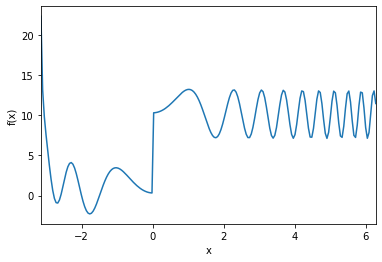

In [22]:
tests.plot_fun(partial(fun3, sigma = 0), bounds)

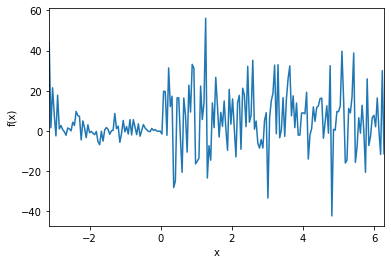

In [23]:
tests.plot_fun(partial(fun3, sigma = sigma), bounds)

### Learner1D - default loss

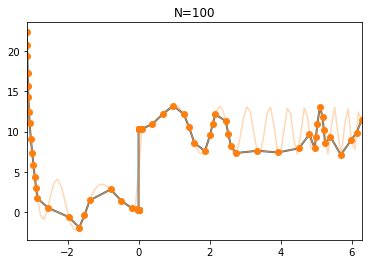

In [24]:
learner1 = adaptive.Learner1D(partial(fun3, sigma = 0), bounds = bounds, 
                              loss_per_interval=default_loss)
tests.run_N(learner1,100)
tests.plot_learner(learner1)

### Learner1D - triangle loss

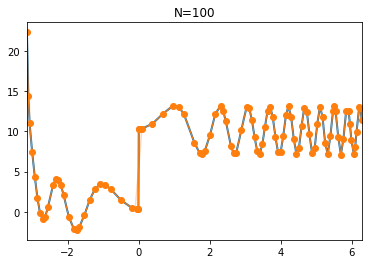

In [25]:
learner1 = adaptive.Learner1D(partial(fun3, sigma = 0), bounds = bounds, 
                              loss_per_interval=triangle_loss)
tests.run_N(learner1,100)
tests.plot_learner(learner1)

### AverageLearner1D

In [52]:
# Learner params
strategy = 5
min_samples = 500
delta = 0.5
alfa = 0.005
min_Delta_g = 0.0005
max_samples = 3000
loss_per_interval = triangle_loss

fun = partial(fun3, sigma = sigma)

randomseed = 2

## -----------------------------------

# Initialize learner
learner = adaptive.AverageLearner1D(fun,
                                    strategy = strategy,
                                    bounds=bounds, delta=delta, 
                                    min_samples=min_samples, alfa=alfa,
                                    max_samples=max_samples)

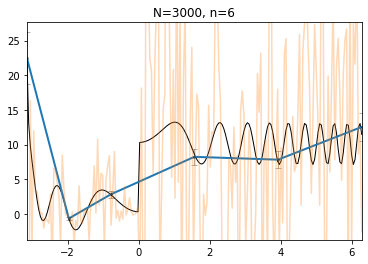

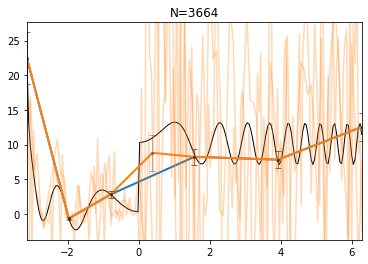

In [53]:
random.seed(randomseed)
np.random.seed(randomseed)

tests.simple_liveplot(learner, N_batch = 1000, goal = lambda l: len(l.data)>100)
                      #goal = lambda l: l.total_samples()==100000)

In [49]:
learner._number_samples

SortedDict({-3.141592653589793: 3000, -3.132388768862479: 100, -3.1231848841351653: 100, -3.104777114680538: 130, -3.0679615757712826: 168, -2.9943304979527716: 100, -2.9206994201342606: 100, -2.84706834231575: 100, -2.6998061866787286: 100, -2.552544031041707: 100, -2.4052818754046856: 100, -2.258019719767664: 101, -2.110757564130642: 100, -1.9634954084936207: 100, -1.8162332528565992: 100, -1.6689710972195777: 100, -1.5217089415825562: 100, -1.3744467859455345: 100, -1.2271846303085128: 100, -1.0799224746714913: 100, -0.9326603190344698: 100, -0.7853981633974483: 194, -0.6381360077604268: 100, -0.4908738521234052: 100, -0.3436116964863836: 100, -0.19634954084936207: 106, -0.04908738521234052: 100, -0.01227184630308513: 100, -0.0030679615757712823: 113, -0.0007669903939428206: 132, -0.00019174759848570515: 105, -4.7936899621426287e-05: 111, -1.1984224905356572e-05: 102, -2.996056226339143e-06: 100, -7.490140565847857e-07: 100, -1.8725351414619643e-07: 100, -4.681337853654911e-08: 100,